<a href="https://colab.research.google.com/github/victorm0202/curso_ML_metagenomica/blob/main/notebooks/metodos_ensamble_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![figure](https://drive.google.com/uc?export=view&id=1aBthHd8htwQd89eWTOSDaDClpisx5FsA)

<center> Estadística y computación para metagenómica<center>

<center> Víctor Muñiz Sánchez <center>
<center> Junio 2023 <center>

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Usaremos los datos MNIST, versión simplificada en imágenes de 8 x 8 pixeles

In [ ]:
mnist = load_digits()
(mnist.data.shape, mnist.target.shape, mnist.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

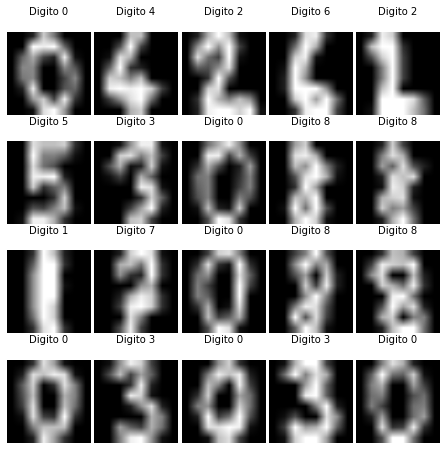

In [ ]:
sel_digits = np.random.choice(mnist.data.shape[0], 20)
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
j = 1
for index, (image, label) in enumerate(zip(mnist.images[sel_digits], mnist.target[sel_digits])):
    plt.subplot(4, 5, j)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.title('Digito %i\n' % label, fontsize = 10)
    j += 1

Obtenemos datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target.astype('int'), 
                                                    test_size=0.25, random_state=0)

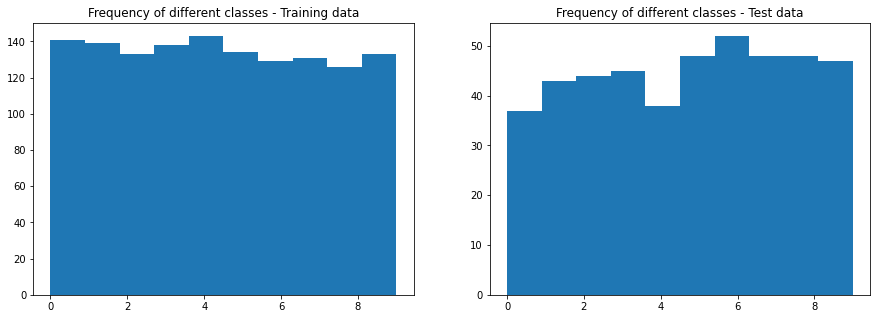

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Test data');

Métodos de ensamble

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
n_trees = 200

CART (referencia)

In [ ]:
cart = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
#cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)

# predecir datos de prueba
y_test_hat = cart.predict(X_test)

print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.85      0.91      0.88        43
           2       0.74      0.77      0.76        44
           3       0.71      0.80      0.75        45
           4       0.89      0.87      0.88        38
           5       0.89      0.83      0.86        48
           6       0.96      0.96      0.96        52
           7       0.95      0.81      0.88        48
           8       0.88      0.77      0.82        48
           9       0.73      0.74      0.74        47

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



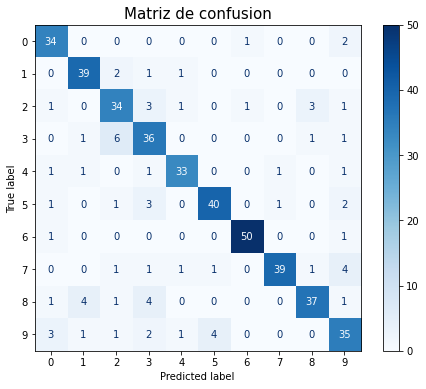

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(cart, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion',{'fontsize':15})
plt.show()

Bagging

In [ ]:
bagging = BaggingClassifier(n_estimators=n_trees, n_jobs=-1, random_state=42)
bagging.fit(X_train,y_train)
# predecir datos de prueba
y_test_hat = bagging.predict(X_test)

print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.93      1.00      0.97        43
           2       1.00      0.91      0.95        44
           3       0.93      0.96      0.95        45
           4       0.95      0.95      0.95        38
           5       0.94      0.96      0.95        48
           6       1.00      0.98      0.99        52
           7       0.98      1.00      0.99        48
           8       0.96      0.94      0.95        48
           9       0.91      0.89      0.90        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



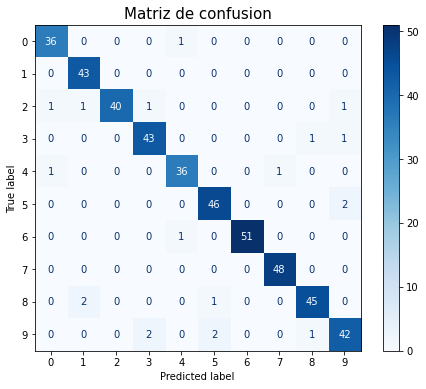

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(bagging, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion',{'fontsize':15})
plt.show()

Importancia de variables en Bagging

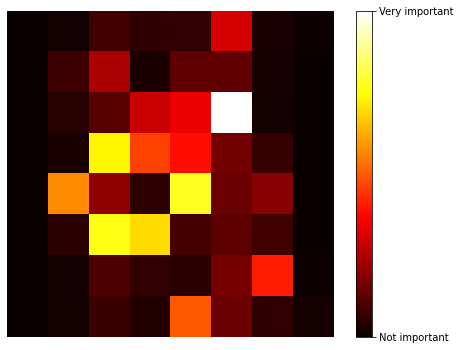

In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging.estimators_
], axis=0)

image = feature_importances.reshape(8, 8)
plt.imshow(image, cmap = mpl.cm.hot,interpolation="nearest")
plt.axis("off")
cbar = plt.colorbar(ticks=[feature_importances.min(), feature_importances.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

Boosting

In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, algorithm="SAMME.R", random_state=42)
adaboost.fit(X_train,y_train)
# predecir datos de prueba
y_test_hat = adaboost.predict(X_test)

print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.93      0.95        43
           2       1.00      1.00      1.00        44
           3       1.00      0.91      0.95        45
           4       1.00      0.97      0.99        38
           5       0.98      0.96      0.97        48
           6       1.00      0.96      0.98        52
           7       0.98      1.00      0.99        48
           8       0.86      1.00      0.92        48
           9       0.96      0.98      0.97        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



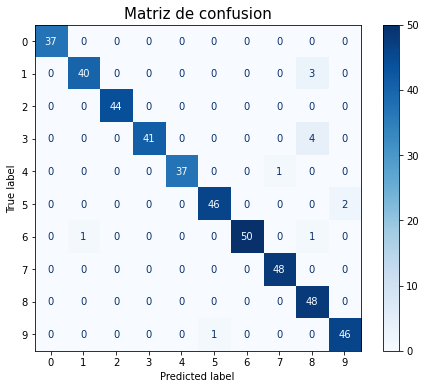

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(adaboost, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion',{'fontsize':15})
plt.show()

Importancia de variables en Boosting

/home/victor/virtualenv/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py:605: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


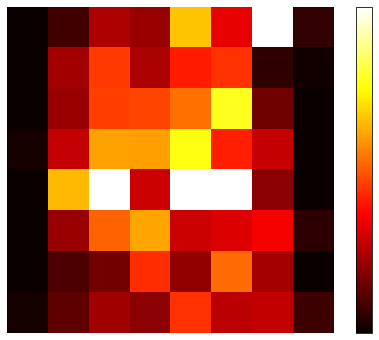

In [ ]:
image = adaboost.feature_importances_.reshape(8, 8)
plt.imshow(image, cmap = mpl.cm.hot,interpolation="nearest")
plt.axis("off")
cbar = plt.colorbar(ticks=[adaboost.feature_importances_.min(), adaboost.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

Random Forests

In [ ]:
rf = RandomForestClassifier(n_estimators=n_trees, min_samples_split=5, n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)
# predecir datos de prueba
y_test_hat = rf.predict(X_test)

print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.98      0.98      0.98        43
           2       1.00      0.95      0.98        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.96      0.98      0.97        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.94      0.96        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



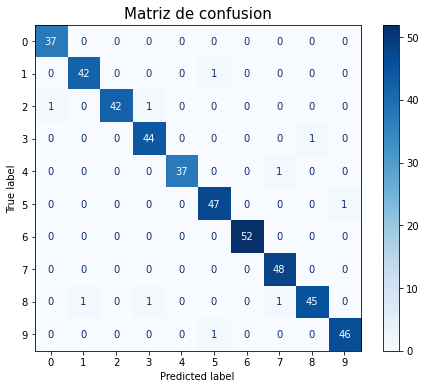

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion',{'fontsize':15})
plt.show()

Importancia de variables en Random Forests

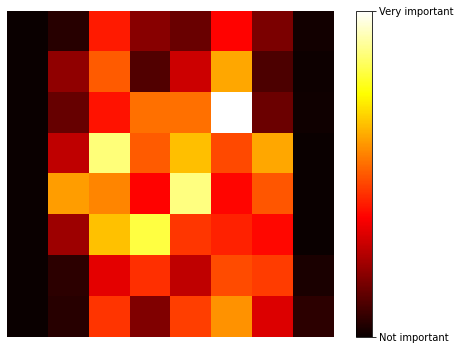

In [ ]:
image = rf.feature_importances_.reshape(8, 8)
plt.imshow(image, cmap = mpl.cm.hot,interpolation="nearest")
plt.axis("off")
cbar = plt.colorbar(ticks=[rf.feature_importances_.min(), rf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()